## Load the Dataset

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/reddit_posts_and_comments.csv')
df.head(20)

,post_title,post_text,subreddit,post_author,post_url,post_upvotes,post_downvotes,comment_upvotes,comment_downvotes,comment_text,comment_author
0,[D] - NeurIPS'2025 Reviews,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning,Proof-Marsupial-5367,https://www.reddit.com/r/MachineLearning/comme...,203,0,77,0,Friendly reminder that reviews this year are s...,ChoiceStranger2898
1,[D] - NeurIPS'2025 Reviews,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning,Proof-Marsupial-5367,https://www.reddit.com/r/MachineLearning/comme...,203,0,36,0,I had a dream recently where my upcoming avera...,popeldo
2,[D] - NeurIPS'2025 Reviews,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning,Proof-Marsupial-5367,https://www.reddit.com/r/MachineLearning/comme...,203,0,63,0,I will treat the scores as a divine interventi...,matcha-coconut
3,[D] - NeurIPS'2025 Reviews,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning,Proof-Marsupial-5367,https://www.reddit.com/r/MachineLearning/comme...,203,0,33,0,"July 24, so as long as it's July 24 somewhere ...",SmolLM
4,[D] - NeurIPS'2025 Reviews,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning,Proof-Marsupial-5367,https://www.reddit.com/r/MachineLearning/comme...,203,0,34,0,"Well, if you feel heart-broken, be assured tha...",Marionberry6886
5,[D] Self-Promotion Thread,"Please post your personal projects, startups, ...",MachineLearning,AutoModerator,https://www.reddit.com/r/MachineLearning/comme...,13,0,2,0,"# Your Creation, Your Proof. Get It Free.\n\nA...",Woundedhealer4u
6,[D] Self-Promotion Thread,"Please post your personal projects, startups, ...",MachineLearning,AutoModerator,https://www.reddit.com/r/MachineLearning/comme...,13,0,2,0,# [A daily Chronicle of AI Innovations in July...,enoumen
7,[D] Self-Promotion Thread,"Please post your personal projects, startups, ...",MachineLearning,AutoModerator,https://www.reddit.com/r/MachineLearning/comme...,13,0,1,0,I've been working on CocoIndex - super simple ...,Whole-Assignment6240
8,[D] Self-Promotion Thread,"Please post your personal projects, startups, ...",MachineLearning,AutoModerator,https://www.reddit.com/r/MachineLearning/comme...,13,0,1,0,🧵 Finance Copilot – AI for your messy P&L file...,Due-Cauliflower5383
9,[D] Self-Promotion Thread,"Please post your personal projects, startups, ...",MachineLearning,AutoModerator,https://www.reddit.com/r/MachineLearning/comme...,13,0,1,0,I need to chase the latest research on arXiv. ...,Used-Sock-130


##Select Relevant Columns

In [2]:
df = df[['post_text', 'subreddit']]

print("Shape of DataFrame:", df.shape)
print(df.head())

Shape of DataFrame: (5708, 2)
                                           post_text        subreddit
0  Hey everyone,\n\nNeurIPS 2025 reviews should b...  MachineLearning
1  Hey everyone,\n\nNeurIPS 2025 reviews should b...  MachineLearning
2  Hey everyone,\n\nNeurIPS 2025 reviews should b...  MachineLearning
3  Hey everyone,\n\nNeurIPS 2025 reviews should b...  MachineLearning
4  Hey everyone,\n\nNeurIPS 2025 reviews should b...  MachineLearning


##Select Subreddit Classes

In [3]:
allowed_subreddits = ['Alzheimers', 'povertyfinance', 'GetMotivated']

df = df[df['subreddit'].isin(allowed_subreddits)]

df = df.reset_index(drop=True)

print("Shape after filtering:", df.shape)
print(df['subreddit'].value_counts())


Shape after filtering: (1256, 2)
subreddit
povertyfinance    420
Alzheimers        419
GetMotivated      417
Name: count, dtype: int64


##Visualize Class Distribution


/tmp/ipython-input-2700630344.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='subreddit', palette='pastel')


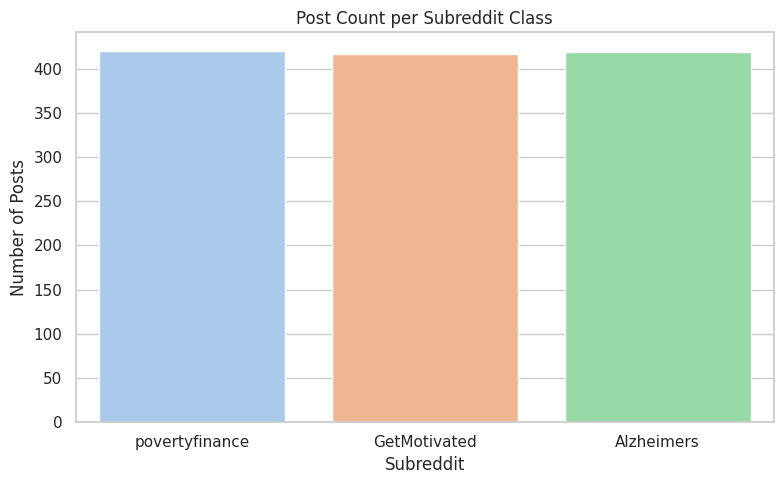

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='subreddit', palette='pastel')

plt.title('Post Count per Subreddit Class')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')

plt.tight_layout()

plt.show()


##Text Preprocessing

##Text Cleaning, Remove Stopwords, & Tokenization

In [5]:
pip install clean-text nltk

In [6]:
from cleantext import clean
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

#Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

#Stopwords
stop_words = set(stopwords.words('english'))

#Text Cleaning
def preprocess_text(text):

    text = clean(text,
                 fix_unicode=True,
                 to_ascii=True,
                 lower=True,
                 no_urls=True,
                 no_emails=True,
                 no_phone_numbers=True,
                 no_currency_symbols=True,
                 no_punct=True,
                 replace_with_punct="",
                 replace_with_url="",
                 replace_with_email="",
                 replace_with_phone_number="",
                 replace_with_currency_symbol=""
                 )

    #Tokenize
    tokens = word_tokenize(text)

    #Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]

    return filtered_tokens

#Apply to post_text column
df['clean_tokens'] = df['post_text'].astype(str).apply(preprocess_text)


print(df[['post_text', 'clean_tokens']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                           post_text  \
0  Two years ago I posted the following message o...   
1  Two years ago I posted the following message o...   
2  Two years ago I posted the following message o...   
3  Two years ago I posted the following message o...   
4  Two years ago I posted the following message o...   

                                        clean_tokens  
0  [two, years, ago, posted, following, message, ...  
1  [two, years, ago, posted, following, message, ...  
2  [two, years, ago, posted, following, message, ...  
3  [two, years, ago, posted, following, message, ...  
4  [two, years, ago, posted, following, message, ...  


In [7]:
cleaned_tokens = preprocess_text("You are stronger than you think. Never give up — every failure is a step toward success!")
cleaned_tokens


['stronger',
 'think',
 'never',
 'give',
 'every',
 'failure',
 'step',
 'toward',
 'success']

##Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['label'] = label_encoder.fit_transform(df['subreddit'])


print(df[['subreddit', 'label']].head())

        subreddit  label
0  povertyfinance      2
1  povertyfinance      2
2  povertyfinance      2
3  povertyfinance      2
4  povertyfinance      2


In [9]:
df

,post_text,subreddit,clean_tokens,label
0,Two years ago I posted the following message o...,povertyfinance,"[two, years, ago, posted, following, message, ...",2
1,Two years ago I posted the following message o...,povertyfinance,"[two, years, ago, posted, following, message, ...",2
2,Two years ago I posted the following message o...,povertyfinance,"[two, years, ago, posted, following, message, ...",2
3,Two years ago I posted the following message o...,povertyfinance,"[two, years, ago, posted, following, message, ...",2
4,Two years ago I posted the following message o...,povertyfinance,"[two, years, ago, posted, following, message, ...",2
...,...,...,...,...
1251,Hello everyone! I will try to keep this short ...,Alzheimers,"[hello, everyone, try, keep, short, sweet, wel...",0
1252,Hello everyone! I will try to keep this short ...,Alzheimers,"[hello, everyone, try, keep, short, sweet, wel...",0
1253,Hello everyone! I will try to keep this short ...,Alzheimers,"[hello, everyone, try, keep, short, sweet, wel...",0
1254,Hello everyone! I will try to keep this short ...,Alzheimers,"[hello, everyone, try, keep, short, sweet, wel...",0


##Vectorization

##TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer


df['clean_text'] = df['clean_tokens'].apply(lambda tokens: ' '.join(tokens))

tfidf = TfidfVectorizer(max_features=5000)


X_tfidf = tfidf.fit_transform(df['clean_text'])

print("TF-IDF Matrix Shape:", X_tfidf.shape)


TF-IDF Matrix Shape: (1256, 5000)


##Word2Vec

In [11]:
pip install gensim

In [12]:
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [13]:
#Train Word2Vec

w2v_model = Word2Vec(sentences=df['clean_tokens'], vector_size=77, window=7, min_count=1, workers=5)

embedding_dim = w2v_model.vector_size

In [14]:
#Create Word Index using Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_tokens'])

sequences = tokenizer.texts_to_sequences(df['clean_tokens'])

vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size:", vocab_size)

Vocabulary Size: 5979


In [15]:
#Pad the sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 75
X_seq = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [16]:
print("Original:", sequences[1])
print("Padded:", X_seq[1])

Original: [90, 20, 111, 532, 1051, 1326, 1052, 160, 1053, 750, 27, 807, 1327, 712, 1775, 250, 58, 1328, 1054, 1776, 334, 237, 260, 1777, 29, 1055, 2725, 1778, 1056, 243, 19, 93, 543, 104, 2726, 2727, 1779, 2728, 1055, 2729, 137, 362, 47, 436, 2730, 2731, 57, 2732, 1329, 544, 174, 1327, 2733, 285, 1778, 2734, 41, 1055, 1711, 2735, 1329, 2736, 2737, 504, 2738, 2739, 4, 256, 1056, 1780, 750, 27, 4, 1781, 13, 1056, 2740, 265, 27, 220, 29, 164, 1782, 5, 2741, 1646, 27, 2742, 737, 69, 1783, 27, 639, 2743, 135, 1190, 1330, 55, 593, 2744, 265, 1784, 372, 681, 1331, 45, 91, 1331, 1327, 67, 42, 2745, 34, 37, 244, 865, 216, 206, 1332, 2746, 1331, 28, 2747, 1332, 216, 1056, 1333, 120, 2748, 261, 639, 1057, 1055, 4, 2402, 206, 751, 350, 170, 16, 2749, 1332, 42, 27, 24, 516, 505, 1334, 640, 67, 1335, 593, 2750, 2751, 70, 387, 3, 693, 2752, 59, 516, 1785, 2753, 1786, 517, 1336, 59, 1058, 593, 192, 2754, 2755, 132, 461, 25, 86, 71, 532, 97, 422, 86, 2610, 2756, 573, 320, 68, 14, 1059, 1589, 2757, 752,

In [17]:
#Embedding Matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, idx in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[idx] = w2v_model.wv[word]

In [18]:
#Embedding Vector for word finance
word = 'finance'
if word in w2v_model.wv:
    print(f"Embedding vector for '{word}':\n", w2v_model.wv[word])
else:
    print(f"'{word}' not found in vocab.")


Embedding vector for 'finance':
 [ 0.01640831  0.00219703 -0.00924684 -0.00051995  0.00524127 -0.01251659
 -0.00146536 -0.01118017  0.01560557 -0.00699945  0.01212521  0.01163151
 -0.00554122  0.01370015 -0.00456735 -0.01507047 -0.00364862 -0.00620186
 -0.00547724 -0.007319   -0.01653562  0.0062901  -0.00769353 -0.00611156
 -0.0098087   0.01011994  0.00752469 -0.00193887 -0.00109277 -0.00132659
 -0.00507468  0.00716763 -0.00249068  0.00026615 -0.00685409 -0.00683156
 -0.00724503  0.0052756  -0.0062282   0.01742051 -0.00078006 -0.009508
 -0.00051547 -0.00528923  0.00961807  0.00701195  0.00389526 -0.00260215
  0.0151155  -0.0112946   0.00847435 -0.00184977 -0.01087169  0.00535313
  0.01125289  0.0146576  -0.01017706  0.01078991  0.00135853 -0.01986548
 -0.00306702 -0.00583805  0.00858769 -0.0109171   0.01492798 -0.00204221
 -0.0021817   0.00172787  0.00405961  0.00808792  0.00031403  0.00682291
 -0.00528838 -0.00887902  0.01070243  0.00231718 -0.00077206]


In [19]:
#Embedding Matrix for an index (1st word)
index = 1
print(f"Embedding vector from embedding_matrix for index {index}:\n", embedding_matrix[index])


Embedding vector from embedding_matrix for index 1:
 [-0.64122856  0.22891977  0.61218911 -1.11599398  0.79354805  0.03387818
  1.10653138  0.71104717 -0.525796   -0.21786588  0.43475494 -0.85807127
 -0.05970793  0.10820962  1.13620901  0.92792445 -0.55006081  0.08729704
  0.98360831  0.37689778  0.80093122 -0.50923604 -0.24017115  0.96107298
  0.34756243 -0.54202867 -0.25209525 -0.34591046 -0.52726209 -0.22488232
 -0.98359489 -0.40564656  0.36134368  0.76691699  0.03082436 -0.32625246
  1.22848153 -0.19601375 -0.31726065 -1.21924484 -0.83678746 -0.75675786
 -1.04725659 -0.99410439 -0.58476925  0.5180608   0.12724784  1.06259596
 -0.14489195  0.18845807 -0.20068409 -0.69126296 -0.18936768 -0.18888956
 -0.44081569 -0.69935727 -0.05674208  0.11353314  0.50528151  1.38719451
 -0.21127383  0.07296522 -0.152622    0.84946483 -0.624358   -0.4061524
 -0.98098129  0.16213295 -0.52818251  0.87266707 -0.37747243 -0.32672948
 -0.06385903  0.57112187 -0.19251622  1.0788703  -1.40410304]


##Model Building

##Split the Dataset

In [20]:
from sklearn.model_selection import train_test_split


X = X_seq
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

#Shapes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1004, 75)
Test shape: (252, 75)


##Build and Train the Models

##Logistic Regression using TF-IDF

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#TF-IDF input and labels
X = X_tfidf
y = df['label']

#Spliting
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

#Train model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train_tfidf)

#Evaluation
y_pred_tfidf = log_reg.predict(X_test_tfidf)

#Metrics
print("Logistic Regression via TF-IDF:\n")
print("Accuracy:", accuracy_score(y_test_tfidf, y_pred_tfidf))
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=label_encoder.classes_))


Logistic Regression via TF-IDF:

Accuracy: 0.9325396825396826
                precision    recall  f1-score   support

    Alzheimers       1.00      0.95      0.98        84
  GetMotivated       0.83      1.00      0.91        84
povertyfinance       1.00      0.85      0.92        84

      accuracy                           0.93       252
     macro avg       0.94      0.93      0.93       252
  weighted avg       0.94      0.93      0.93       252



##RNN

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report


#One Hot Encoder
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

#EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#RNN Model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=vocab_size,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=X_train.shape[1],
                        trainable=True))
rnn_model.add(SimpleRNN(64, return_sequences=False))
rnn_model.add(Dense(3, activation='softmax'))

#Compiling
rnn_model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

#Training
rnn = rnn_model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

#Evaluating
loss, accuracy = rnn_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nRNN Accuracy: {accuracy:.4f}")

#Prediction
y_pred_probs = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

print("\nRNN Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.4153 - loss: 1.0992 - val_accuracy: 0.6151 - val_loss: 0.9317
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7080 - loss: 0.8394 - val_accuracy: 0.7897 - val_loss: 0.5544
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9012 - loss: 0.3580 - val_accuracy: 0.9127 - val_loss: 0.2551
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9514 - loss: 0.1928 - val_accuracy: 0.9127 - val_loss: 0.2382
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9435 - loss: 0.1501 - val_accuracy: 0.9127 - val_loss: 0.2046
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9651 - loss: 0.1147 - val_accuracy: 0.9127 - val_loss: 0.2343
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9562 - loss: 0.1470 - val_accuracy: 0.9127 - val_loss: 0.2178
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9674 - loss: 0.1116 - val_accuracy: 0.9127 - v

##LSTM

In [28]:
from tensorflow.keras.layers import Embedding, LSTM, Dense

#One Hot Encoder
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

#EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=X_train.shape[1],
                    trainable=True))
lstm_model.add(LSTM(150, return_sequences=True))
lstm_model.add(LSTM(150))
lstm_model.add(Dense(3, activation='softmax'))

#Compiling
lstm_model.compile(loss='categorical_crossentropy',
                   optimizer=Adam(learning_rate=0.001),
                   metrics=['accuracy'])

#Training
lstm = lstm_model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

#Evaluating
loss, accuracy = lstm_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nLSTM Accuracy: {accuracy:.4f}")

#Prediction
y_pred_probs = lstm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

#Report
print("\nLSTM Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - accuracy: 0.3520 - loss: 1.1108 - val_accuracy: 0.4127 - val_loss: 1.0749
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 285ms/step - accuracy: 0.4204 - loss: 1.0667 - val_accuracy: 0.4048 - val_loss: 1.0495
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 314ms/step - accuracy: 0.4768 - loss: 1.0323 - val_accuracy: 0.4405 - val_loss: 0.9694
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 329ms/step - accuracy: 0.6283 - loss: 0.7399 - val_accuracy: 0.7579 - val_loss: 0.5435
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 268ms/step - accuracy: 0.7533 - loss: 0.4757 - val_accuracy: 0.6944 - val_loss: 0.6648
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 291ms/step - accuracy: 0.7525 - loss: 0.5325 - val_accuracy: 0.7500 - val_loss: 0.4886
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 331ms/step - accuracy: 0.8790 - loss: 0.3116 - val_accuracy: 0.8929 - val_loss: 0.3547
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 326ms/step - accuracy: 0.9513 - loss: 0.1393 - val_accuracy: 0.900

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step

LSTM Report:
                precision    recall  f1-score   support

    Alzheimers       0.96      0.95      0.96        84
  GetMotivated       0.79      1.00      0.88        84
povertyfinance       1.00      0.75      0.86        84

      accuracy                           0.90       252
     macro avg       0.92      0.90      0.90       252
  weighted avg       0.92      0.90      0.90       252



##Final Prediction

In [32]:
import numpy as np
import pickle
from keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from cleantext import clean
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

#Load tokenizer, label encoder, and model
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

model = load_model('/content/lstm_model.h5')

#Constants
MAXLEN = 75
stop_words = set(stopwords.words('english'))

#Text preprocessing
def preprocess_text(text):
    text = clean(
        text,
        fix_unicode=True,
        to_ascii=True,
        lower=True,
        no_urls=True,
        no_emails=True,
        no_phone_numbers=True,
        no_currency_symbols=True,
        no_punct=True
    )
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return filtered_tokens

#Final Prediction
def predict_subreddit(text):
    tokens = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([tokens])
    padded = pad_sequences(sequence, maxlen=MAXLEN, padding='post')
    pred = model.predict(padded)
    pred_class = np.argmax(pred, axis=1)
    label = label_encoder.inverse_transform(pred_class)[0]
    return label


In [34]:
text = "I feel really discouraged lately, looking for some motivation."
predicted_label = predict_subreddit(text)
print("Predicted Subreddit:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Subreddit: GetMotivated


##Pickel

In [35]:
import pickle
from tensorflow.keras.models import load_model

#Savetokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

#Save label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

#Save LSTM model in HDF5
lstm_model.save("lstm_model.h5")

print("Tokenizer, LabelEncoder, and LSTM model saved!")


Tokenizer, LabelEncoder, and LSTM model saved!


##Gradio

In [37]:
import gradio as gr


#Load model and tools
model = load_model("lstm_model.h5")
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)
with open("label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

#Preprocessing
def preprocess(text):
    text = clean(text,
                 fix_unicode=True, to_ascii=True, lower=True,
                 no_urls=True, no_emails=True, no_phone_numbers=True,
                 no_currency_symbols=True, no_punct=True)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return ' '.join(tokens)

#Predict
def predict_subreddit(post_text):
    clean_text = preprocess(post_text)
    seq = tokenizer.texts_to_sequences([clean_text])
    padded = pad_sequences(seq, maxlen=100, padding='post')
    pred = model.predict(padded)
    class_idx = np.argmax(pred, axis=1)[0]
    return label_encoder.inverse_transform([class_idx])[0]

#Gradio Interface
demo = gr.Interface(fn=predict_subreddit,
                    inputs=gr.Textbox(lines=5, placeholder="Enter a Reddit post..."),
                    outputs="text",
                    title="Subreddit Post Classifier (LSTM)",
                    description="Paste a Reddit post and get predicted subreddit.")

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://168e62980317cd14b5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
